In [1]:
{-# LANGUAGE NoMonomorphismRestriction #-}
{-# LANGUAGE FlexibleContexts          #-}
import Diagrams.Prelude

In [2]:
locs   = [(x, y) | x <- [0.1, 0.3 .. 3.25], y <- [0.1, 0.3 .. 3.25]]

Create a list of points where the vectors will be placed.



In [3]:
points = map p2 locs

The function to use to create the vector field.



In [4]:
vectorField (x, y) = r2 (sin (y + 1), sin (x + 1))

arrows = map arrowAtPoint locs

arrowAtPoint (x, y) = arrowAt' opts (p2 (x, y)) (sL *^ vf) # alignTL
  where
    vf   = vectorField (x, y)
    m    = norm $ vectorField (x, y)

-- Head size is a function of the length of the vector
-- as are tail size and shaft length.

    hs   = 0.02 * m
    sW   = 0.004 * m
    sL   = 0.05 + 0.1 * m
    opts = (with & arrowHead  .~ spike
                 & headLength .~ normalized hs
                 & shaftStyle %~ lwN sW)

field   = position $ zip points arrows

example = ( field # translateY 0.05
       <> ( square 3.5 # lw none # alignBL))

Line 16: Redundant bracket
Found:
(with & arrowHead .~ spike & headLength .~ normalized hs
   & shaftStyle %~ lwN sW)
Why not:
with & arrowHead .~ spike & headLength .~ normalized hs
  & shaftStyle %~ lwN sWLine 22: Redundant bracket
Found:
(field # translateY 0.05 <> (square 3.5 # lw none # alignBL))
Why not:
field # translateY 0.05 <> (square 3.5 # lw none # alignBL)

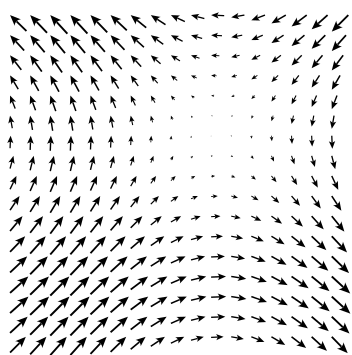

In [5]:
diagram example